# Exercise 1. 

Write a Python script to implement the backpropagation algorithm for a 1− $S^{1}$−1 network. 

Write the program using matrix operations. Choose the initial weights and biases to be random numbers *uniformly* distributed between -0.5 and 0.5, and train the network to approximate the function:

$g(p) = e^{-\vert p \vert}\sin(\pi p)$ for $−2 \leq p \leq 2$

Use $S^{1}=2$ and $S^{1}=10$. Experiment with several different values for the learning rate, $\alpha$, and use several different initial conditions. Discuss the convergence properties of the algorithm as the learning rate changes.

Plot the trained networks with the network outputs. Compare them. Check the squared error for each epochs.

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# define the transfer functions we need for our network

# logsig transfer function
def logsig(n):
    return 1 / (1 + np.exp(-n))

# purelin transfer function
def purelin(n):
    return n

In [3]:
# define the gradients of the transfer functions

# logsig transfer function
def logsig_grad(a): 
    return (1 - a) * a

# purelin transfer function
def purelin_grad(a): 
    return 1

In [4]:
# generate linearly spaced inputs in the range [-2, 2]
p = np.linspace(start=-2, stop=2, num=100)
# make the inputs 2D so we can specify input dimensions
p = p.reshape(-1,1)

In [5]:
# get targets by using function to approximate, g(p)
g = np.exp(-np.abs(p))*np.sin(np.pi*p)

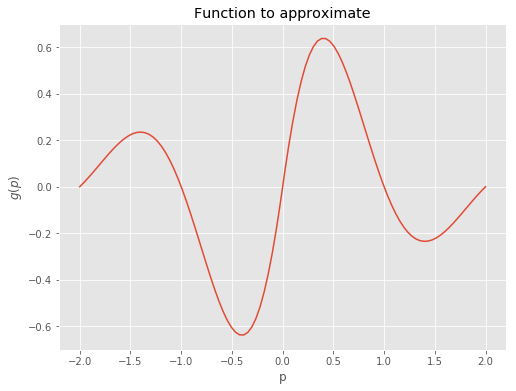

In [6]:
plt.figure(figsize=(8,6))
plt.plot(p, g, label='$g(p)$')
plt.xlabel('p')
plt.ylabel('$g(p)$')
plt.title('Function to approximate')
plt.show()

**Recall.** When we have a 3-layer Perceptron, we say it is an $R-S^{1}-S^{2}-S^{3}$ network. Since our network is a $1-S^{1}-1$ network, we know $R=1$ and $S^{2}=1$. We let $S^{1}$ fluctuate 

In [7]:
# number of features
R = p.shape[1]

## Part 1. $S^{1} = 2$

In [8]:
# number of neurons in the hidden layer
S1 = 2
# number of neurons in the output layer
S2 = 1

In [9]:
# set the seed
np.random.seed(0)

# randomly initialize weights
W1 = np.random.uniform(low=-0.5,high=0.5,size=(S1,R))
# randomly initialize bias
b1 = np.random.uniform(low=-0.5,high=0.5,size=(S1,1))
W2 = np.random.uniform(low=-0.5,high=0.5,size=(S2,S1))
b2 = np.random.uniform(low=-0.5,high=0.5,size=(S2,1))

In [10]:
# learning rate, alpha
alpha = 0.01
# epochs
epochs = 1300

In [11]:
# initialize a zero vector of errors for each output-target

# error vector for each input
e = np.zeros(len(p))
# error vector for MSE in each epoch
MSE = np.zeros(shape=(1,epochs))

### Walk through the process for one input

In [12]:
W1.shape

(2, 1)

In [13]:
b1.shape

(2, 1)

In [14]:
# example input 
p[0]

array([-2.])

In [384]:
p[0].shape

(1,)

In [15]:
p[0].reshape(-1,1)

array([[-2.]])

In [16]:
p[0].reshape(-1,1).shape

(1, 1)

In [17]:
W1_test = W1
W2_test = W2
b1_test = b1
b2_test = b2

n1_test = W1_test * p[0] + b1_test
print(n1_test)

[[ 0.00513637]
 [-0.38549555]]


In [18]:
a1_test = logsig(n1_test)
a1_test.shape

(2, 1)

In [19]:
n2_test = W2_test.dot(a1_test) + b2_test
n2_test.shape

(1, 1)

In [21]:
a2_test = purelin(n2_test)
a2_test

array([[-0.04162518]])

In [22]:
e_test = g[0] - a2_test
print(e_test)

[[ 0.04162518]]


In [24]:
logsig_gradient_test = logsig_grad(a1_test)
logsig_gradient_test

array([[ 0.24999835],
       [ 0.24093736]])

In [25]:
f1_dot_test = np.diagflat(logsig_gradient_test)
print(f1_dot_test.shape)
print(f1_dot_test)

(2, 2)
[[ 0.24999835  0.        ]
 [ 0.          0.24093736]]


In [26]:
f2_dot_test = purelin_grad(a2_test)
f2_dot_test

1

In [27]:
s2_test = -2 * f2_dot_test * e_test
s2_test

array([[-0.08325035]])

In [28]:
s1_test = f1_dot_test.dot(W2_test.transpose()) * s2_test
s1_test

array([[ 0.00158893],
       [-0.00292636]])

In [29]:
W2_test = W2_test - alpha * s2_test * a1_test.transpose()
W2_test.shape

(1, 2)

In [30]:
W1_test = W1_test - alpha * s1_test * p[0].transpose()
W1_test.shape

(2, 1)

In [31]:
b2_test = b2_test - alpha * s2_test
b2_test.shape

(1, 1)

In [32]:
b1_test = b1_test - alpha * s1_test
b1_test.shape

(2, 1)

### Train the network

In [12]:
# ----------- Train the network -----------

# for each epoch 
for epoch in range(epochs):
    # for each input
    for i in range(p.shape[0]):
        # 1) propagate input forward
        n1 = W1 * p[i] + b1
        a1 = logsig(n1)
        n2 = W2.dot(a1) + b2
        a2 = purelin(n2)
        # 2) calculate the error
        # difference between g(p_{i}) and a2 (network output)
        e[i] = g[i] - a2
        # 3) Backprop sensitivities
        g_logsig = logsig_grad(a1)
        f1_dot = np.diagflat(g_logsig)
        f2_dot = purelin_grad(a2)
        s2 = -2 * f2_dot * e[i]
        s1 = f1_dot.dot(W2.transpose()) * s2
        # 4) Update weight and bias
        W2 = W2 - alpha * s2 * a1.transpose()
        W1 = W1 - alpha * s1 * p[i].transpose()
        b2 = b2 - alpha * s2
        b1 = b1 - alpha * s1
    MSE[0, epoch] = e.transpose().dot(e)

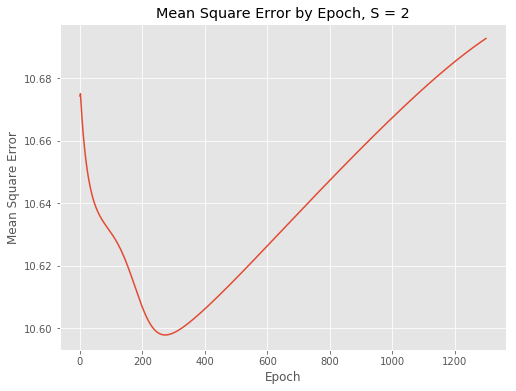

In [13]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(1,epochs+1), MSE[0,:], ls='-')
plt.title('Mean Square Error by Epoch, S = 2')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.show()

In [14]:
# empty vector for trained network output
a_S2 = np.ones(shape=(p.shape))

# calculate network output
for i in range(p.shape[0]):
    n1 = W1 * p[i] + b1
    a1 = logsig(n1)
    n2 = W2.dot(a1) + b2
    a_S2[i] = purelin(n2)

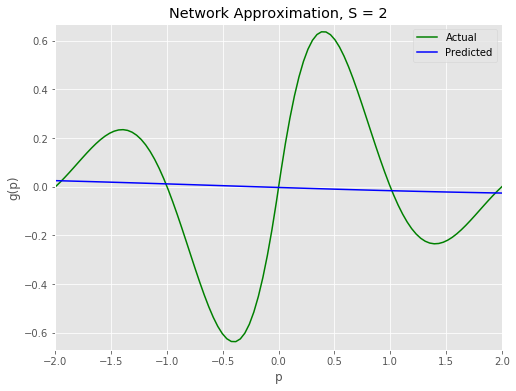

In [15]:
plt.figure(figsize=(8,6))
plt.plot(p, g, label='Actual', color='green')
plt.plot(p, a_S2, label='Predicted', color='blue')
plt.title("Network Approximation, S = 2")
plt.xlabel("p")
plt.ylabel("g(p)")
plt.xlim((-2,2))
plt.ylim((-0.67, 0.67))
plt.legend(loc='best')
plt.show()

## Part 1. $S^{1} = 10$

In [16]:
# number of neurons in the hidden layer
S1 = 10
# number of neurons in the output layer
S2 = 1

In [17]:
# set the seed
np.random.seed(0)

# randomly initialize weights
W1 = np.random.uniform(low=-0.5,high=0.5,size=(S1,R))
# randomly initialize bias
b1 = np.random.uniform(low=-0.5,high=0.5,size=(S1,1))
W2 = np.random.uniform(low=-0.5,high=0.5,size=(S2,S1))
b2 = np.random.uniform(low=-0.5,high=0.5,size=(S2,1))

In [18]:
# initialize a zero vector of errors for each output-target

# error vector for each input
e = np.zeros(len(g))
# error vector for MSE in each epoch
MSE = np.zeros(shape=(1,epochs))

In [19]:
# ----------- Train the network -----------

# for each epoch 
for epoch in range(epochs):
    # for each input
    for i in range(p.shape[0]):
        # 1) propagate input forward
        n1 = W1 * p[i] + b1
        a1 = logsig(n1)
        n2 = W2.dot(a1) + b2
        a2 = purelin(n2)
        # 2) calculate the error
        # difference between g(p_{i}) and a2 (network output)
        e[i] = g[i] - a2
        # 3) Backprop sensitivities
        g_logsig = logsig_grad(a1)
        f1_dot = np.diagflat(g_logsig)
        f2_dot = purelin_grad(a2)
        s2 = -2 * f2_dot * e[i]
        s1 = f1_dot.dot(W2.transpose()) * s2
        # 4) Update weight and bias
        W2 = W2 - alpha * s2 * a1.transpose()
        W1 = W1 - alpha * s1 * p[i].transpose()
        b2 = b2 - alpha * s2
        b1 = b1 - alpha * s1
    MSE[0, epoch] = e.transpose().dot(e)

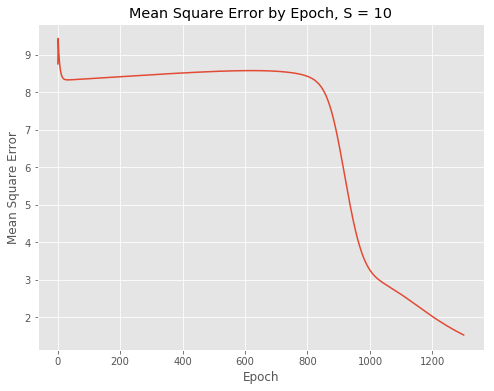

In [22]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(1,epochs+1), MSE[0,:], ls='-')
plt.title('Mean Square Error by Epoch, S = 10')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
#plt.ylim(0,6)
plt.show()

In [23]:
# empty vector for trained network output
a_S10 = np.ones(shape=(p.shape))

# calculate network output
for i in range(p.shape[0]):
    n1 = W1 * p[i] + b1
    a1 = logsig(n1)
    n2 = W2.dot(a1) + b2
    a_S10[i] = purelin(n2)

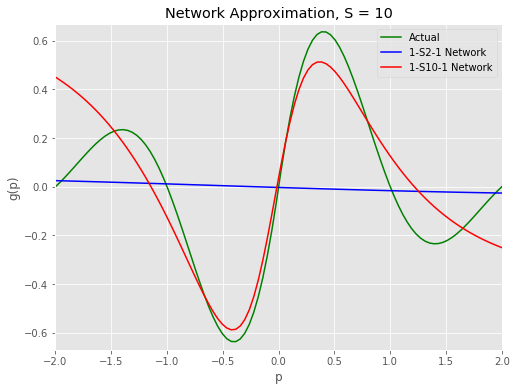

In [24]:
plt.figure(figsize=(8,6))
plt.plot(p, g, label='Actual', color='green')
plt.plot(p, a_S2, label='1-S2-1 Network', color='blue')
plt.plot(p, a_S10, label='1-S10-1 Network', color='red')
plt.title("Network Approximation, S = 10")
plt.xlabel("p")
plt.ylabel("g(p)")
plt.xlim((-2,2))
plt.ylim((-0.67, 0.67))
#plt.tight_layout()
plt.legend(loc='best')
plt.show()